In [74]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install scipy

# Importovanje potrebnih paketa za rad sa algoritmima nadgledanog učenja

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report,r2_score, mean_squared_error, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import iqr
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.decomposition import PCA

# Učitavanje dataset-a

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Sredjivanje dataseta

### jedna od tehnika za preprocesiranje dataseta je eliminacija kolona koje nisu od važnosti za samu odluku kasnije, tj ne nose nikakve dodatne informacije. Primer takve kolone bi bio id podatka i njegova eliminacija bi se vršila na sledeći način:

In [7]:
#dataset.drop(['id'], axis=1, inplace=True)

### sledeća tehnika jeste da se svi podaci pretvore u numeričke. S obzirom da u našem datasetu to nije neophodno uraditi, u nastavku je krpz komentar dat deo koda koji bi ilustrovao ovu tehniku:

In [8]:
#dataset['label_spam'] = [1 if b=='S' else 0 for b in dataset.label_spam]

### sledeća tehnika bila bi eliminacija duplikata

In [3]:
dataset = dataset.drop_duplicates()
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### sledeća tehnika je eliminacija vrsta iz dataseta koje nisu potpune, tj imaju NaN vrednosti nekih atributa

In [4]:
dataset.dropna()
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Deskriptivna analiza dataset-a
### - MEAN

In [5]:
#Mean
dataset.mean()

word_freq_make                  0.104366
word_freq_address               0.112656
word_freq_all                   0.291473
word_freq_3d                    0.063078
word_freq_our                   0.325321
word_freq_over                  0.096656
word_freq_remove                0.117475
word_freq_internet              0.108000
word_freq_order                 0.091860
word_freq_mail                  0.248420
word_freq_receive               0.056686
word_freq_will                  0.565204
word_freq_people                0.097656
word_freq_report                0.061211
word_freq_addresses             0.044803
word_freq_free                  0.253829
word_freq_business              0.149154
word_freq_email                 0.188755
word_freq_you                   1.718368
word_freq_credit                0.084962
word_freq_your                  0.810040
word_freq_font                  0.131587
word_freq_000                   0.100622
word_freq_money                 0.090969
word_freq_hp    

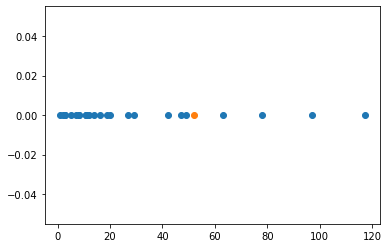

In [6]:
y = np.zeros((25))
plt.scatter(random.sample(list(dataset['capital_run_length_longest']),25), y)
plt.scatter(dataset['capital_run_length_longest'].mean(),0)

### - MEDIAN

In [7]:
# Median
dataset.median()

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.000
word_freq_3d                    0.000
word_freq_our                   0.000
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.000
word_freq_receive               0.000
word_freq_will                  0.190
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.000
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   1.360
word_freq_credit                0.000
word_freq_your                  0.290
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

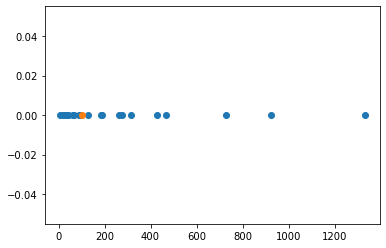

In [8]:
y = np.zeros((25))
plt.scatter(random.sample(list(dataset['capital_run_length_total']),25), y)
plt.scatter(dataset['capital_run_length_total'].median(),0)

### - MODE 

In [9]:
# Mode
dataset.mode()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,7,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


### - STANDARD DEVIATION 

In [10]:
#Standard deviation
dataset.std()

word_freq_make                  0.300005
word_freq_address               0.454260
word_freq_all                   0.515719
word_freq_3d                    1.352487
word_freq_our                   0.687805
word_freq_over                  0.276030
word_freq_remove                0.397284
word_freq_internet              0.410282
word_freq_order                 0.282144
word_freq_mail                  0.656638
word_freq_receive               0.184167
word_freq_will                  0.882513
word_freq_people                0.309309
word_freq_report                0.346066
word_freq_addresses             0.242186
word_freq_free                  0.797534
word_freq_business              0.457669
word_freq_email                 0.541133
word_freq_you                   1.768760
word_freq_credit                0.505583
word_freq_your                  1.149352
word_freq_font                  1.071258
word_freq_000                   0.351336
word_freq_money                 0.431723
word_freq_hp    

### - VARIANCE 

In [11]:
# Variance
dataset.var()

word_freq_make                     0.090003
word_freq_address                  0.206352
word_freq_all                      0.265966
word_freq_3d                       1.829221
word_freq_our                      0.473076
word_freq_over                     0.076193
word_freq_remove                   0.157834
word_freq_internet                 0.168332
word_freq_order                    0.079605
word_freq_mail                     0.431174
word_freq_receive                  0.033917
word_freq_will                     0.778829
word_freq_people                   0.095672
word_freq_report                   0.119761
word_freq_addresses                0.058654
word_freq_free                     0.636061
word_freq_business                 0.209461
word_freq_email                    0.292825
word_freq_you                      3.128512
word_freq_credit                   0.255614
word_freq_your                     1.321010
word_freq_font                     1.147594
word_freq_000                   

### - INTERQUARTILE RANGE

In [12]:
# Interquartile Range
for column in dataset.columns:
    print(column + ": "+ str(iqr(dataset[column])))

word_freq_make: 0.0
word_freq_address: 0.0
word_freq_all: 0.44
word_freq_3d: 0.0
word_freq_our: 0.41
word_freq_over: 0.0
word_freq_remove: 0.0
word_freq_internet: 0.0
word_freq_order: 0.0
word_freq_mail: 0.19
word_freq_receive: 0.0
word_freq_will: 0.83
word_freq_people: 0.0
word_freq_report: 0.0
word_freq_addresses: 0.0
word_freq_free: 0.1275
word_freq_business: 0.0
word_freq_email: 0.0
word_freq_you: 2.72
word_freq_credit: 0.0
word_freq_your: 1.28
word_freq_font: 0.0
word_freq_000: 0.0
word_freq_money: 0.0
word_freq_hp: 0.0975
word_freq_hpl: 0.0
word_freq_george: 0.0
word_freq_650: 0.0
word_freq_lab: 0.0
word_freq_labs: 0.0
word_freq_telnet: 0.0
word_freq_857: 0.0
word_freq_data: 0.0
word_freq_415: 0.0
word_freq_85: 0.0
word_freq_technology: 0.0
word_freq_1999: 0.0
word_freq_parts: 0.0
word_freq_pm: 0.0
word_freq_direct: 0.0
word_freq_cs: 0.0
word_freq_meeting: 0.0
word_freq_original: 0.0
word_freq_project: 0.0
word_freq_re: 0.17
word_freq_edu: 0.0
word_freq_table: 0.0
word_freq_confe

### - SKEWNESS

In [13]:
# Skewness
dataset.skew()

word_freq_make                 5.869855
word_freq_address             13.464664
word_freq_all                  2.980623
word_freq_3d                  27.209539
word_freq_our                  4.696946
word_freq_over                 6.122653
word_freq_remove               6.808707
word_freq_internet             9.734232
word_freq_order                5.284306
word_freq_mail                 8.568579
word_freq_receive              5.078281
word_freq_will                 2.828005
word_freq_people               6.889952
word_freq_report              11.564142
word_freq_addresses            7.513375
word_freq_free                 9.387745
word_freq_business             5.567668
word_freq_email                5.453867
word_freq_you                  1.524251
word_freq_credit              15.430174
word_freq_your                 2.245707
word_freq_font                 9.541533
word_freq_000                  5.859524
word_freq_money               15.556682
word_freq_hp                   5.638834


### - KURTOSIS

In [14]:
# Kurtosis
dataset.kurt()

word_freq_make                  54.351406
word_freq_address              306.685973
word_freq_all                   12.941447
word_freq_3d                   788.370058
word_freq_our                   37.064801
word_freq_over                  71.603267
word_freq_remove                76.381647
word_freq_internet             167.550219
word_freq_order                 48.011373
word_freq_mail                 162.539033
word_freq_receive               34.656119
word_freq_will                  12.096068
word_freq_people                82.596297
word_freq_report               219.645155
word_freq_addresses             69.493809
word_freq_free                 157.691742
word_freq_business              43.514184
word_freq_email                 48.157461
word_freq_you                    4.998066
word_freq_credit               424.685771
word_freq_your                   8.094203
word_freq_font                  99.666089
word_freq_000                   49.119948
word_freq_money                340

# Deskriptivna analiza - pregled 

In [15]:
# Descriptive analysis
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Raspodela podataka po klasama (SPAM or NOT SPAM)

#NOT SPAM:  2531
#SPAM:  1679


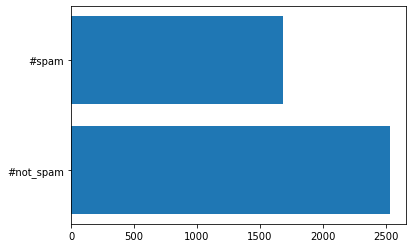

In [17]:
not_spam_count, spam_count = dataset['label_spam'].value_counts()
plt.barh(["#not_spam","#spam"], [not_spam_count, spam_count])
print("#NOT SPAM:  "+str(not_spam_count))
print("#SPAM:  "+ str(spam_count))

### Balansiranje dataseta - UNDERSAMPLING
#### Izbacivanje random uzoraka iz klase sa većim brojem instanci

#NOT SPAM:  1813
#SPAM:  1679


<BarContainer object of 2 artists>

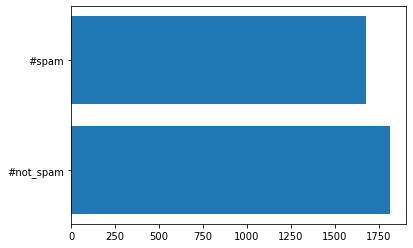

In [18]:
#Solving unbalanced dataset 
#1 undersampling

df_majority_US = dataset[dataset.label_spam == 0]
df_minority_US = dataset[dataset.label_spam == 1]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = 1813, random_state = 123)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_not_spam, undersampled_spam = df_undersampled .label_spam.value_counts()
print("#NOT SPAM:  "+str(undersampled_not_spam))
print("#SPAM:  "+ str(undersampled_spam))
plt.barh(["#not_spam","#spam"], [undersampled_not_spam, undersampled_spam])

### Balansiranje stabla - OVERSAMPLING

#### Dodavanje duplikata iz klase sa manjim brojem instanci

#NOT SPAM:  2788
#SPAM:  2531


<BarContainer object of 2 artists>

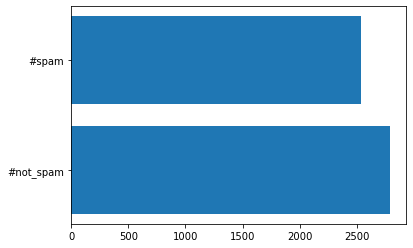

In [19]:
#2 oversampling
df_majority_OS = dataset[dataset.label_spam==0]
df_minority_OS = dataset[dataset.label_spam==1]
df_minority_upsampled = resample(df_minority_OS, 
                                 replace=True,     # sample with replacement
                                 n_samples=2788,    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_not_spam, oversampled_spam = df_upsampled.label_spam.value_counts()
print("#NOT SPAM:  "+str(oversampled_not_spam))
print("#SPAM:  "+ str(oversampled_spam))
plt.barh(["#not_spam","#spam"], [oversampled_not_spam, oversampled_spam])

# Priprema dataseta za podelu na train i test

### bez balansiranja

In [20]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values

X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

### undersampling

In [21]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values

X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

### upsampling

In [22]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values

X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

# Algoritmi za predikciju
### LOGISTIC REGRESSION

### bez balansiranja i cross validacije

In [23]:
logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)

#### Različite metrike za evaluaciju prediktivnog algoritma

In [24]:
conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
TP_imbalanced = conf_matrix_imbalanced[1,1]
TN_imbalanced = conf_matrix_imbalanced[0,0]
FP_imbalanced = conf_matrix_imbalanced[0,1]
FN_imbalanced = conf_matrix_imbalanced[1,0]
sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)

#### Prikaz dobijenih evaluacionih parametara

In [25]:
print("Accuracy: ", accuracy_imbalanced)
print("F1 Score: ", f1_imbalanced)
print("Precision: ", precision_imbalanced)
print("Recall: ", recall_imbalanced)
print("Specificity: ", specificity_imbalanced)
print("Sensitivity: ", sensitivity_imbalanced)
print("True positive: ", TP_imbalanced)
print("False positive: ", FP_imbalanced)
print("True negative: ", TN_imbalanced)
print("False negative: ", FN_imbalanced)

Accuracy:  92.63657957244655
F1 Score:  0.9025157232704404
Precision:  0.9169329073482428
Recall:  0.8885448916408669
Specificity:  0.9499036608863198
Sensitivity:  0.8885448916408669
True positive:  287
False positive:  26
True negative:  493
False negative:  36


### Undersampling bez cross validacije

In [26]:
logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)

#### Različite metrike za evaluaciju prediktivnog algoritma

In [27]:
conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
TP_undersampled = conf_matrix_undersampled[1,1]
TN_undersampled = conf_matrix_undersampled[0,0]
FP_undersampled = conf_matrix_undersampled[0,1]
FN_undersampled = conf_matrix_undersampled[1,0]
sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)

#### Prikaz dobijenih evaluacionih parametara

In [28]:
print("Accuracy: ", accuracy_undersampled)
print("F1 Score: ", f1_undersampled)
print("Precision: ", precision_undersampled)
print("Recall: ", recall_undersampled)
print("Specificity: ", specificity_undersampled)
print("Sensitivity: ", sensitivity_undersampled)
print("True positive: ", TP_undersampled)
print("False positive: ", FP_undersampled)
print("True negative: ", TN_undersampled)
print("False negative: ", FN_undersampled)

Accuracy:  92.84692417739629
F1 Score:  0.9246987951807231
Precision:  0.9331306990881459
Recall:  0.9164179104477612
Specificity:  0.9395604395604396
Sensitivity:  0.9164179104477612
True positive:  307
False positive:  22
True negative:  342
False negative:  28


### upsampling bez cross validacije

In [29]:
logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)

#### Različite metrike za evaluaciju prediktivnog algoritma

In [30]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

#### Prikaz dobijenih evaluacionih parametara

In [31]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  91.9172932330827
F1 Score:  0.9209558823529411
Precision:  0.9277777777777778
Recall:  0.9142335766423357
Specificity:  0.9244186046511628
Sensitivity:  0.9142335766423357
True positive:  501
False positive:  39
True negative:  477
False negative:  47


### Vizuelizacija nekih mera postignutih rezultata korišćenjem Logistic Regression prediktivnog algoritma bez cross validacije

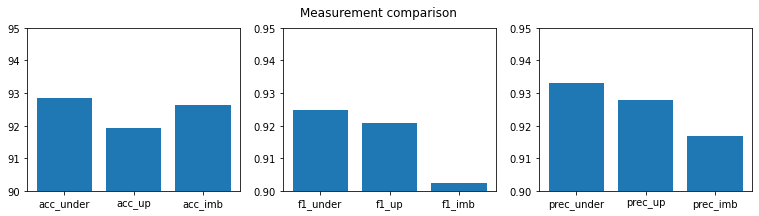

In [32]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_under', 'acc_up', 'acc_imb'], [accuracy_undersampled, accuracy_upsampled, accuracy_imbalanced])
plt.subplot(132)
plt.ylim(0.9,0.95)
plt.bar(['f1_under', 'f1_up','f1_imb'], [f1_undersampled, f1_upsampled, f1_imbalanced])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_under', 'prec_up', 'prec_imb'], [precision_undersampled, precision_upsampled, [precision_imbalanced]])
plt.suptitle('Measurement comparison')
plt.show()


# Logistic regression sa cross validacijom

## bez balansiranja

In [34]:
kf = KFold(n_splits=5,random_state = 42, shuffle = True)

accuracy_LR_crossVal_imb = []
f1_LR_crossVal_imb = []
precision_LR_crossVal_imb = []

for train_index,test_index in kf.split(X_imbalanced):
    X_train_imbalanced,X_test_imbalanced=X_imbalanced[train_index],X_imbalanced[test_index]
    y_train_imbalanced,y_test_imbalanced=y_imbalanced[train_index],y_imbalanced[test_index]
    
    logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
    logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    accuracy_LR_crossVal_imb.append(accuracy_imbalanced)
    f1_LR_crossVal_imb.append(f1_imbalanced)
    precision_LR_crossVal_imb.append(precision_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  92.04275534441805
F1 Score:  0.9041487839771102
Precision:  0.9294117647058824
Recall:  0.8802228412256268
Specificity:  0.9503105590062112
Sensitivity:  0.8802228412256268
True positive:  316
False positive:  24
True negative:  459
False negative:  43
-------------
Accuracy:  91.44893111638956
F1 Score:  0.8912386706948641
Precision:  0.9076923076923077
Recall:  0.8753709198813057
Specificity:  0.9405940594059405
Sensitivity:  0.8753709198813057
True positive:  295
False positive:  30
True negative:  475
False negative:  42
-------------
Accuracy:  93.34916864608076
F1 Score:  0.910828025477707
Precision:  0.9255663430420712
Recall:  0.896551724137931
Specificity:  0.9560229445506692
Sensitivity:  0.896551724137931
True positive:  286
False positive:  23
True negative:  500
False negative:  33
-------------
Accuracy:  92.39904988123516
F1 Score:  0.9006211180124223
Precision:  0.9235668789808917
Recall:  0.8787878787878788
Specificity:  0.953125
Sensitivity:  0.878787878787

### undersampling

In [35]:
kf = KFold(n_splits=5,random_state = 42, shuffle = True)

accuracy_LR_crossVal_under = []
f1_LR_crossVal_under = []
precision_LR_crossVal_under = []

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    accuracy_LR_crossVal_under.append(accuracy_undersampled)
    f1_LR_crossVal_under.append(f1_undersampled)
    precision_LR_crossVal_under.append(precision_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")

Accuracy:  91.84549356223177
F1 Score:  0.9087999999999999
Precision:  0.8987341772151899
Recall:  0.919093851132686
Specificity:  0.9179487179487179
Sensitivity:  0.919093851132686
True positive:  284
False positive:  32
True negative:  358
False negative:  25
-------------
Accuracy:  91.41630901287554
F1 Score:  0.9112426035502958
Precision:  0.9194029850746268
Recall:  0.9032258064516129
Specificity:  0.9245810055865922
Sensitivity:  0.9032258064516129
True positive:  308
False positive:  27
True negative:  331
False negative:  33
-------------
Accuracy:  93.40974212034384
F1 Score:  0.9325513196480939
Precision:  0.9464285714285714
Recall:  0.9190751445086706
Specificity:  0.9488636363636364
Sensitivity:  0.9190751445086706
True positive:  318
False positive:  18
True negative:  334
False negative:  28
-------------
Accuracy:  92.69340974212035
F1 Score:  0.9264069264069265
Precision:  0.9385964912280702
Recall:  0.9145299145299145
Specificity:  0.9394812680115274
Sensitivity:  0.9

### upsampling

In [36]:
kf = KFold(n_splits=5,random_state = 42, shuffle = True)

accuracy_LR_crossVal_up = []
f1_LR_crossVal_up = []
precision_LR_crossVal_up = []

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    accuracy_LR_crossVal_up.append(accuracy_upsampled)
    f1_LR_crossVal_up.append(f1_upsampled)
    precision_LR_crossVal_up.append(precision_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  92.95112781954887
F1 Score:  0.9301025163094129
Precision:  0.9362101313320825
Recall:  0.924074074074074
Specificity:  0.9351145038167938
Sensitivity:  0.924074074074074
True positive:  499
False positive:  34
True negative:  490
False negative:  41
-------------
Accuracy:  91.9172932330827
F1 Score:  0.9209558823529411
Precision:  0.9209558823529411
Recall:  0.9209558823529411
Specificity:  0.9173076923076923
Sensitivity:  0.9209558823529411
True positive:  501
False positive:  43
True negative:  477
False negative:  43
-------------
Accuracy:  93.32706766917293
F1 Score:  0.9388458225667528
Precision:  0.9332191780821918
Recall:  0.9445407279029463
Specificity:  0.919917864476386
Sensitivity:  0.9445407279029463
True positive:  545
False positive:  39
True negative:  448
False negative:  32
-------------
Accuracy:  94.07894736842105
F1 Score:  0.9416126042632067
Precision:  0.9372693726937269
Recall:  0.9459962756052142
Specificity:  0.9354838709677419
Sensitivity:  0.945

### Logistic Regression sa cross validacijom (prikaz rezultata)

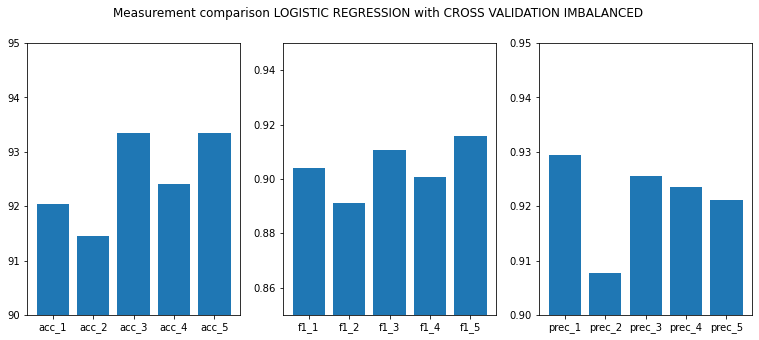

In [47]:
plt.figure(figsize=(13, 5))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5'], [accuracy_LR_crossVal_imb[0], accuracy_LR_crossVal_imb[1], accuracy_LR_crossVal_imb[2],accuracy_LR_crossVal_imb[3],accuracy_LR_crossVal_imb[4]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4','f1_5'], [f1_LR_crossVal_imb[0],f1_LR_crossVal_imb[1],f1_LR_crossVal_imb[2],f1_LR_crossVal_imb[3],f1_LR_crossVal_imb[4]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4','prec_5'], [precision_LR_crossVal_imb[0], precision_LR_crossVal_imb[1], precision_LR_crossVal_imb[2],precision_LR_crossVal_imb[3],precision_LR_crossVal_imb[4]])
plt.suptitle('Measurement comparison LOGISTIC REGRESSION with CROSS VALIDATION IMBALANCED')
plt.show()

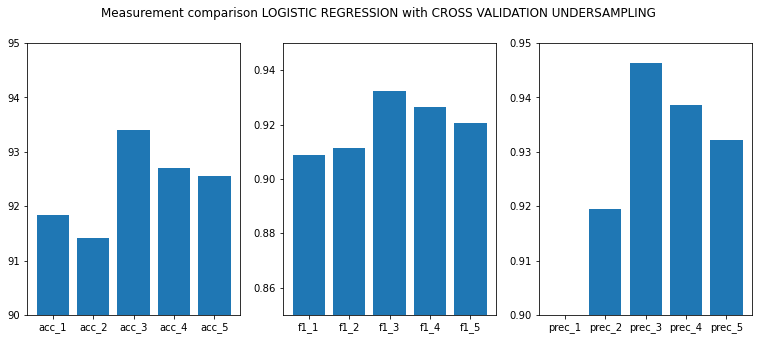

In [46]:
plt.figure(figsize=(13, 5))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5'], [accuracy_LR_crossVal_under[0], accuracy_LR_crossVal_under[1], accuracy_LR_crossVal_under[2],accuracy_LR_crossVal_under[3],accuracy_LR_crossVal_under[4]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4','f1_5'], [f1_LR_crossVal_under[0],f1_LR_crossVal_under[1],f1_LR_crossVal_under[2],f1_LR_crossVal_under[3],f1_LR_crossVal_under[4]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4','prec_5'], [precision_LR_crossVal_under[0], precision_LR_crossVal_under[1], precision_LR_crossVal_under[2],precision_LR_crossVal_under[3],precision_LR_crossVal_under[4]])
plt.suptitle('Measurement comparison LOGISTIC REGRESSION with CROSS VALIDATION UNDERSAMPLING')
plt.show()

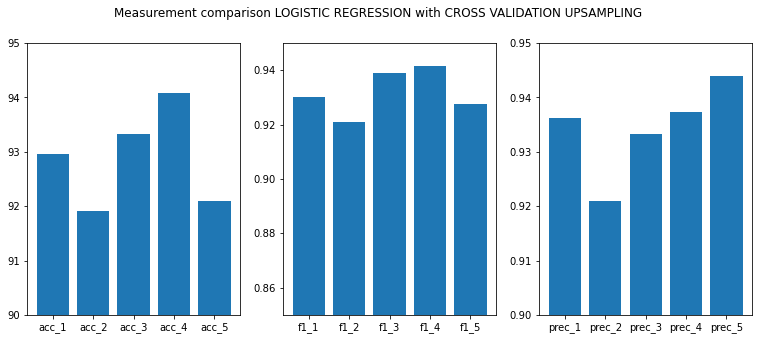

In [45]:
plt.figure(figsize=(13, 5))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5'], [accuracy_LR_crossVal_up[0], accuracy_LR_crossVal_up[1], accuracy_LR_crossVal_up[2],accuracy_LR_crossVal_up[3],accuracy_LR_crossVal_up[4]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4','f1_5'], [f1_LR_crossVal_up[0],f1_LR_crossVal_up[1],f1_LR_crossVal_up[2],f1_LR_crossVal_up[3],f1_LR_crossVal_up[4]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4','prec_5'], [precision_LR_crossVal_up[0], precision_LR_crossVal_up[1], precision_LR_crossVal_up[2],precision_LR_crossVal_up[3],precision_LR_crossVal_up[4]])
plt.suptitle('Measurement comparison LOGISTIC REGRESSION with CROSS VALIDATION UPSAMPLING')
plt.show()

## Repeated kfold

### bez balansiranja

In [51]:
kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

accuracy_LR_crossVal_imb = []
f1_LR_crossVal_imb = []
precision_LR_crossVal_imb = []

for train_index,test_index in kf.split(X_imbalanced):
    X_train_imbalanced,X_test_imbalanced=X_imbalanced[train_index],X_imbalanced[test_index]
    y_train_imbalanced,y_test_imbalanced=y_imbalanced[train_index],y_imbalanced[test_index]
    
    logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
    logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    accuracy_LR_crossVal_imb.append(accuracy_imbalanced)
    f1_LR_crossVal_imb.append(f1_imbalanced)
    precision_LR_crossVal_imb.append(precision_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  90.97387173396675
F1 Score:  0.8869047619047619
Precision:  0.9030303030303031
Recall:  0.8713450292397661
Specificity:  0.936
Sensitivity:  0.8713450292397661
True positive:  745
False positive:  80
True negative:  1170
False negative:  110
-------------
Accuracy:  93.0166270783848
F1 Score:  0.9100917431192661
Precision:  0.9173859432799013
Recall:  0.9029126213592233
Specificity:  0.9476971116315379
Sensitivity:  0.9029126213592233
True positive:  744
False positive:  67
True negative:  1214
False negative:  80
-------------
Accuracy:  92.7790973871734
F1 Score:  0.9060568603213844
Precision:  0.9255050505050505
Recall:  0.887409200968523
Specificity:  0.9538702111024238
Sensitivity:  0.887409200968523
True positive:  733
False positive:  59
True negative:  1220
False negative:  93
-------------
Accuracy:  91.59144893111639
F1 Score:  0.8945801072066706
Precision:  0.9092009685230025
Recall:  0.88042203985932
Specificity:  0.9400958466453674
Sensitivity:  0.88042203985932

### undersampling

In [52]:
kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

accuracy_LR_crossVal_under = []
f1_LR_crossVal_under = []
precision_LR_crossVal_under = []

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    accuracy_LR_crossVal_under.append(accuracy_undersampled)
    f1_LR_crossVal_under.append(f1_undersampled)
    precision_LR_crossVal_under.append(precision_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")

Accuracy:  91.8098510882016
F1 Score:  0.912751677852349
Precision:  0.9155446756425949
Recall:  0.9099756690997567
Specificity:  0.9253246753246753
Sensitivity:  0.9099756690997567
True positive:  748
False positive:  69
True negative:  855
False negative:  74
-------------
Accuracy:  91.69530355097365
F1 Score:  0.9138443256090314
Precision:  0.9309927360774818
Recall:  0.897316219369895
Specificity:  0.9358830146231721
Sensitivity:  0.897316219369895
True positive:  769
False positive:  57
True negative:  832
False negative:  88
-------------
Accuracy:  92.26804123711341
F1 Score:  0.920728126834997
Precision:  0.9333333333333333
Recall:  0.9084588644264194
Specificity:  0.9365798414496036
Sensitivity:  0.9084588644264194
True positive:  784
False positive:  56
True negative:  827
False negative:  79
-------------
Accuracy:  92.32531500572738
F1 Score:  0.9173859432799013
Precision:  0.9230769230769231
Recall:  0.9117647058823529
Specificity:  0.9333333333333333
Sensitivity:  0.9117

### upsampling

In [53]:
kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

accuracy_LR_crossVal_up = []
f1_LR_crossVal_up = []
precision_LR_crossVal_up = []

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    accuracy_LR_crossVal_up.append(accuracy_upsampled)
    f1_LR_crossVal_up.append(f1_upsampled)
    precision_LR_crossVal_up.append(precision_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  92.81954887218045
F1 Score:  0.9306211405739193
Precision:  0.9343544857768052
Recall:  0.926917510853835
Specificity:  0.9295774647887324
Sensitivity:  0.926917510853835
True positive:  1281
False positive:  90
True negative:  1188
False negative:  101
-------------
Accuracy:  92.59119969913502
F1 Score:  0.9295673936360387
Precision:  0.9345794392523364
Recall:  0.9246088193456614
Specificity:  0.9273743016759777
Sensitivity:  0.9246088193456614
True positive:  1300
False positive:  91
True negative:  1162
False negative:  106
-------------
Accuracy:  91.9172932330827
F1 Score:  0.9226896799712334
Precision:  0.9270231213872833
Recall:  0.9183965640658555
Specificity:  0.9200316706254948
Sensitivity:  0.9183965640658555
True positive:  1283
False positive:  101
True negative:  1162
False negative:  114
-------------
Accuracy:  93.53140278300113
F1 Score:  0.9383070301291249
Precision:  0.9362920544022906
Recall:  0.9403306973400432
Specificity:  0.9298107255520505
Sensitiv

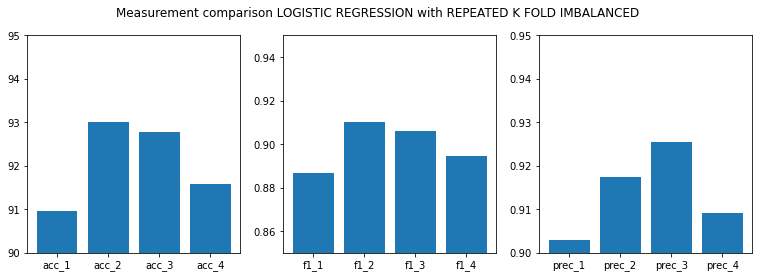

In [55]:
plt.figure(figsize=(13, 4))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4'], [accuracy_LR_crossVal_imb[0], accuracy_LR_crossVal_imb[1], accuracy_LR_crossVal_imb[2],accuracy_LR_crossVal_imb[3]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4'], [f1_LR_crossVal_imb[0],f1_LR_crossVal_imb[1],f1_LR_crossVal_imb[2],f1_LR_crossVal_imb[3]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4'], [precision_LR_crossVal_imb[0], precision_LR_crossVal_imb[1], precision_LR_crossVal_imb[2],precision_LR_crossVal_imb[3]])
plt.suptitle('Measurement comparison LOGISTIC REGRESSION with REPEATED K FOLD IMBALANCED')
plt.show()

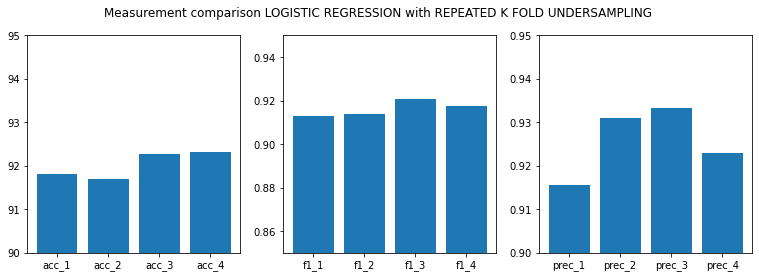

In [56]:
plt.figure(figsize=(13, 4))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4'], [accuracy_LR_crossVal_under[0], accuracy_LR_crossVal_under[1], accuracy_LR_crossVal_under[2],accuracy_LR_crossVal_under[3]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4'], [f1_LR_crossVal_under[0],f1_LR_crossVal_under[1],f1_LR_crossVal_under[2],f1_LR_crossVal_under[3]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4'], [precision_LR_crossVal_under[0], precision_LR_crossVal_under[1], precision_LR_crossVal_under[2],precision_LR_crossVal_under[3]])
plt.suptitle('Measurement comparison LOGISTIC REGRESSION with REPEATED K FOLD UNDERSAMPLING')
plt.show()

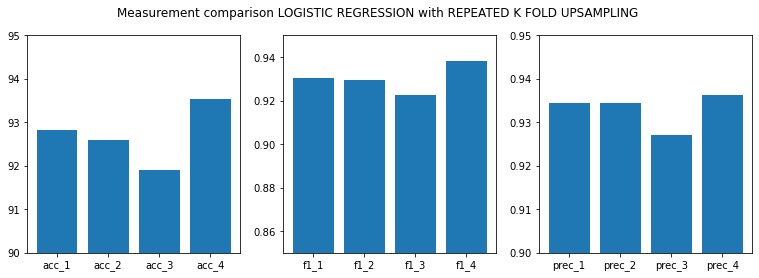

In [57]:
plt.figure(figsize=(13, 4))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4'], [accuracy_LR_crossVal_up[0], accuracy_LR_crossVal_up[1], accuracy_LR_crossVal_up[2],accuracy_LR_crossVal_up[3]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4'], [f1_LR_crossVal_up[0],f1_LR_crossVal_up[1],f1_LR_crossVal_up[2],f1_LR_crossVal_up[3]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4'], [precision_LR_crossVal_up[0], precision_LR_crossVal_up[1], precision_LR_crossVal_up[2],precision_LR_crossVal_up[3]])
plt.suptitle('Measurement comparison LOGISTIC REGRESSION with REPEATED K FOLD UPSAMPLING')
plt.show()

# GRADIENT BOOST 

## bez balansiranja

In [58]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values

X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

In [59]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [60]:
gradient_booster.fit(X_train_imbalanced,y_train_imbalanced)
prediction_imbalanced=gradient_booster.predict(X_test_imbalanced)

In [61]:
conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
TP_imbalanced = conf_matrix_imbalanced[1,1]
TN_imbalanced = conf_matrix_imbalanced[0,0]
FP_imbalanced = conf_matrix_imbalanced[0,1]
FN_imbalanced = conf_matrix_imbalanced[1,0]
sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    


In [62]:
print("Accuracy: ", accuracy_imbalanced)
print("F1 Score: ", f1_imbalanced)
print("Precision: ", precision_imbalanced)
print("Recall: ", recall_imbalanced)
print("Specificity: ", specificity_imbalanced)
print("Sensitivity: ", sensitivity_imbalanced)
print("True positive: ", TP_imbalanced)
print("False positive: ", FP_imbalanced)
print("True negative: ", TN_imbalanced)
print("False negative: ", FN_imbalanced)
print("-------------")

Accuracy:  93.94299287410927
F1 Score:  0.9194312796208531
Precision:  0.9387096774193548
Recall:  0.9009287925696594
Specificity:  0.9633911368015414
Sensitivity:  0.9009287925696594
True positive:  291
False positive:  19
True negative:  500
False negative:  32
-------------


### undersampling

In [63]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

In [64]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [65]:
gradient_booster.fit(X_train_undersampled,y_train_undersampled)
prediction_undersampled=gradient_booster.predict(X_test_undersampled)

In [66]:
conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
TP_undersampled = conf_matrix_undersampled[1,1]
TN_undersampled = conf_matrix_undersampled[0,0]
FP_undersampled = conf_matrix_undersampled[0,1]
FN_undersampled = conf_matrix_undersampled[1,0]
sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)

In [67]:
print("Accuracy: ", accuracy_undersampled)
print("F1 Score: ", f1_undersampled)
print("Precision: ", precision_undersampled)
print("Recall: ", recall_undersampled)
print("Specificity: ", specificity_undersampled)
print("Sensitivity: ", sensitivity_undersampled)
print("True positive: ", TP_undersampled)
print("False positive: ", FP_undersampled)
print("True negative: ", TN_undersampled)
print("False negative: ", FN_undersampled)

Accuracy:  94.84978540772532
F1 Score:  0.944954128440367
Precision:  0.9686520376175548
Recall:  0.9223880597014925
Specificity:  0.9725274725274725
Sensitivity:  0.9223880597014925
True positive:  309
False positive:  10
True negative:  354
False negative:  26


### upsampling

In [68]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [69]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [70]:
gradient_booster.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled=gradient_booster.predict(X_test_upsampled)

In [71]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [72]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  94.73684210526315
F1 Score:  0.948905109489051
Precision:  0.948905109489051
Recall:  0.948905109489051
Specificity:  0.9457364341085271
Sensitivity:  0.948905109489051
True positive:  520
False positive:  28
True negative:  488
False negative:  28


## Komparacija mera za Gradient Boost bez cross validacije

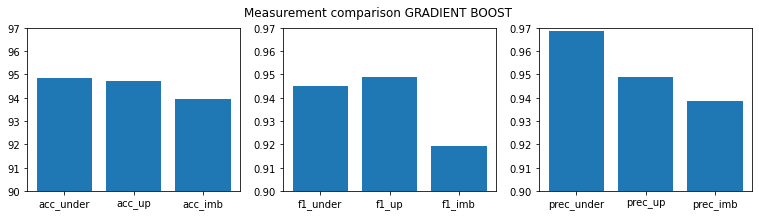

In [74]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(90,97)
plt.bar(['acc_under', 'acc_up', 'acc_imb'], [accuracy_undersampled, accuracy_upsampled, accuracy_imbalanced])
plt.subplot(132)
plt.ylim(0.9,0.97)
plt.bar(['f1_under', 'f1_up','f1_imb'], [f1_undersampled, f1_upsampled, f1_imbalanced])
plt.subplot(133)
plt.ylim(0.9,0.97)
plt.bar(['prec_under', 'prec_up', 'prec_imb'], [precision_undersampled, precision_upsampled, [precision_imbalanced]])
plt.suptitle('Measurement comparison GRADIENT BOOST')
plt.show()

# Gradient Boost sa cross validacijom

## KFold

### bez balansiranja

In [81]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values
X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

accuracy_GB_crossVal_imb = []
f1_GB_crossVal_imb = []
precision_GB_crossVal_imb = []

for train_index,test_index in kf.split(X_imbalanced):    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced=gradient_booster.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    accuracy_GB_crossVal_imb.append(accuracy_imbalanced)
    f1_GB_crossVal_imb.append(f1_imbalanced)
    precision_GB_crossVal_imb.append(precision_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  93.94299287410927
F1 Score:  0.9194312796208531
Precision:  0.9387096774193548
Recall:  0.9009287925696594
Specificity:  0.9633911368015414
Sensitivity:  0.9009287925696594
True positive:  291
False positive:  19
True negative:  500
False negative:  32
-------------
Accuracy:  93.94299287410927
F1 Score:  0.9194312796208531
Precision:  0.9387096774193548
Recall:  0.9009287925696594
Specificity:  0.9633911368015414
Sensitivity:  0.9009287925696594
True positive:  291
False positive:  19
True negative:  500
False negative:  32
-------------
Accuracy:  93.94299287410927
F1 Score:  0.9194312796208531
Precision:  0.9387096774193548
Recall:  0.9009287925696594
Specificity:  0.9633911368015414
Sensitivity:  0.9009287925696594
True positive:  291
False positive:  19
True negative:  500
False negative:  32
-------------
Accuracy:  93.94299287410927
F1 Score:  0.9194312796208531
Precision:  0.9387096774193548
Recall:  0.9009287925696594
Specificity:  0.9633911368015414
Sensitivity:  0

### undersampling

In [78]:
#gradient boost
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

accuracy_GB_crossVal_under = []
f1_GB_crossVal_under = []
precision_GB_crossVal_under = []

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled=gradient_booster.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    accuracy_GB_crossVal_under.append(accuracy_undersampled)
    f1_GB_crossVal_under.append(f1_undersampled)
    precision_GB_crossVal_under.append(precision_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")


Accuracy:  93.41917024320458
F1 Score:  0.9250814332247557
Precision:  0.9311475409836065
Recall:  0.919093851132686
Specificity:  0.9461538461538461
Sensitivity:  0.919093851132686
True positive:  284
False positive:  21
True negative:  369
False negative:  25
-------------
Accuracy:  93.84835479256081
F1 Score:  0.9362962962962963
Precision:  0.9461077844311377
Recall:  0.9266862170087976
Specificity:  0.9497206703910615
Sensitivity:  0.9266862170087976
True positive:  316
False positive:  18
True negative:  340
False negative:  25
-------------
Accuracy:  95.12893982808023
F1 Score:  0.9507246376811593
Precision:  0.9534883720930233
Recall:  0.9479768786127167
Specificity:  0.9545454545454546
Sensitivity:  0.9479768786127167
True positive:  328
False positive:  16
True negative:  336
False negative:  18
-------------
Accuracy:  92.26361031518626
F1 Score:  0.9215116279069767
Precision:  0.9406528189910979
Recall:  0.9031339031339032
Specificity:  0.9423631123919308
Sensitivity:  0.9

### upsampling

In [79]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

accuracy_GB_crossVal_up = []
f1_GB_crossVal_up = []
precision_GB_crossVal_up = []

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled=gradient_booster.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    accuracy_GB_crossVal_up.append(accuracy_upsampled)
    f1_GB_crossVal_up.append(f1_upsampled)
    precision_GB_crossVal_up.append(precision_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  95.11278195488721
F1 Score:  0.951310861423221
Precision:  0.9621212121212122
Recall:  0.9407407407407408
Specificity:  0.9618320610687023
Sensitivity:  0.9407407407407408
True positive:  508
False positive:  20
True negative:  504
False negative:  32
-------------
Accuracy:  94.17293233082707
F1 Score:  0.9431192660550458
Precision:  0.9413919413919414
Recall:  0.9448529411764706
Specificity:  0.9384615384615385
Sensitivity:  0.9448529411764706
True positive:  514
False positive:  32
True negative:  488
False negative:  30
-------------
Accuracy:  95.48872180451127
F1 Score:  0.9584055459272097
Precision:  0.9584055459272097
Recall:  0.9584055459272097
Specificity:  0.9507186858316222
Sensitivity:  0.9584055459272097
True positive:  553
False positive:  24
True negative:  463
False negative:  24
-------------
Accuracy:  95.48872180451127
F1 Score:  0.9552238805970149
Precision:  0.9570093457943926
Recall:  0.9534450651769087
Specificity:  0.9563567362428842
Sensitivity:  0.

### GRADIENT BOOST sa cross validacijom (prikaz rezultata)

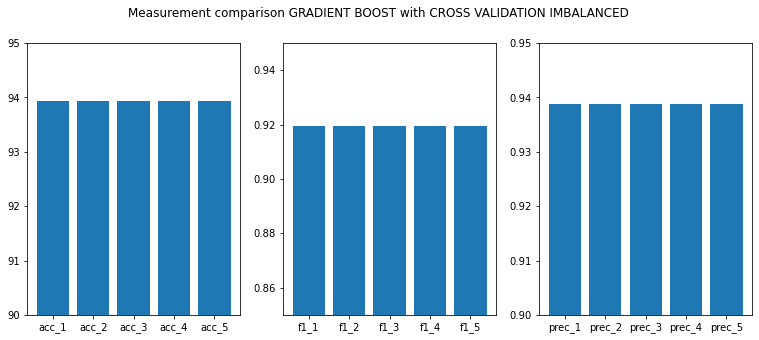

In [80]:
plt.figure(figsize=(13, 5))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5'], [accuracy_GB_crossVal_imb[0], accuracy_GB_crossVal_imb[1], accuracy_GB_crossVal_imb[2],accuracy_GB_crossVal_imb[3],accuracy_GB_crossVal_imb[4]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4','f1_5'], [f1_GB_crossVal_imb[0],f1_GB_crossVal_imb[1],f1_GB_crossVal_imb[2],f1_GB_crossVal_imb[3],f1_GB_crossVal_imb[4]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4','prec_5'], [precision_GB_crossVal_imb[0], precision_GB_crossVal_imb[1], precision_GB_crossVal_imb[2],precision_GB_crossVal_imb[3],precision_GB_crossVal_imb[4]])
plt.suptitle('Measurement comparison GRADIENT BOOST with CROSS VALIDATION IMBALANCED')
plt.show()

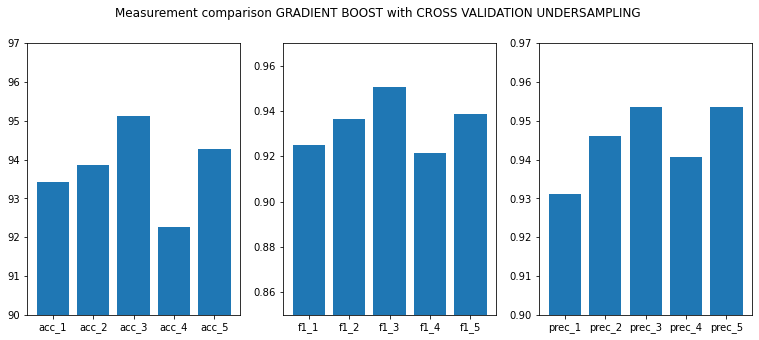

In [83]:
plt.figure(figsize=(13, 5))
plt.subplot(131)
plt.ylim(90,97)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5'], [accuracy_GB_crossVal_under[0], accuracy_GB_crossVal_under[1], accuracy_GB_crossVal_under[2],accuracy_GB_crossVal_under[3],accuracy_GB_crossVal_under[4]])
plt.subplot(132)
plt.ylim(0.85,0.97)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4','f1_5'], [f1_GB_crossVal_under[0],f1_GB_crossVal_under[1],f1_GB_crossVal_under[2],f1_GB_crossVal_under[3],f1_GB_crossVal_under[4]])
plt.subplot(133)
plt.ylim(0.9,0.97)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4','prec_5'], [precision_GB_crossVal_under[0], precision_GB_crossVal_under[1], precision_GB_crossVal_under[2],precision_GB_crossVal_under[3],precision_GB_crossVal_under[4]])
plt.suptitle('Measurement comparison GRADIENT BOOST with CROSS VALIDATION UNDERSAMPLING')
plt.show()

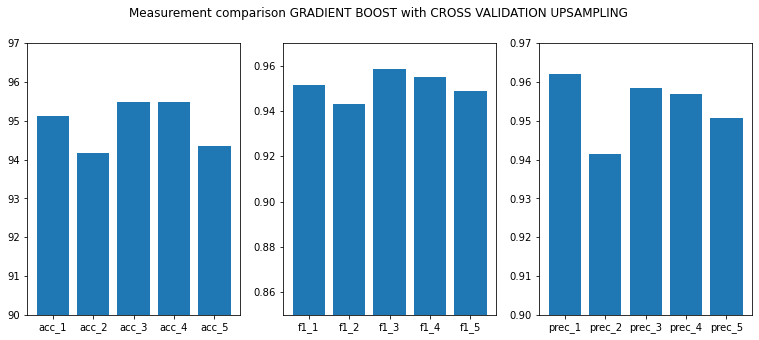

In [85]:
plt.figure(figsize=(13, 5))
plt.subplot(131)
plt.ylim(90,97)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5'], [accuracy_GB_crossVal_up[0], accuracy_GB_crossVal_up[1], accuracy_GB_crossVal_up[2],accuracy_GB_crossVal_up[3],accuracy_GB_crossVal_up[4]])
plt.subplot(132)
plt.ylim(0.85,0.97)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4','f1_5'], [f1_GB_crossVal_up[0],f1_GB_crossVal_up[1],f1_GB_crossVal_up[2],f1_GB_crossVal_up[3],f1_GB_crossVal_up[4]])
plt.subplot(133)
plt.ylim(0.9,0.97)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4','prec_5'], [precision_GB_crossVal_up[0], precision_GB_crossVal_up[1], precision_GB_crossVal_up[2],precision_GB_crossVal_up[3],precision_GB_crossVal_up[4]])
plt.suptitle('Measurement comparison GRADIENT BOOST with CROSS VALIDATION UPSAMPLING')
plt.show()

## Repeated KFold

### bez balansiranja

In [90]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values
X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

accuracy_GB_crossVal_imb = []
f1_GB_crossVal_imb = []
precision_GB_crossVal_imb = []

for train_index,test_index in kf.split(X_imbalanced):
    X_train_imbalanced,X_test_imbalanced=X_imbalanced[train_index],X_imbalanced[test_index]
    y_train_imbalanced,y_test_imbalanced=y_imbalanced[train_index],y_imbalanced[test_index]
    
    logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
    logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    accuracy_GB_crossVal_imb.append(accuracy_imbalanced)
    f1_GB_crossVal_imb.append(f1_imbalanced)
    precision_GB_crossVal_imb.append(precision_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  90.97387173396675
F1 Score:  0.8869047619047619
Precision:  0.9030303030303031
Recall:  0.8713450292397661
Specificity:  0.936
Sensitivity:  0.8713450292397661
True positive:  745
False positive:  80
True negative:  1170
False negative:  110
-------------
Accuracy:  93.0166270783848
F1 Score:  0.9100917431192661
Precision:  0.9173859432799013
Recall:  0.9029126213592233
Specificity:  0.9476971116315379
Sensitivity:  0.9029126213592233
True positive:  744
False positive:  67
True negative:  1214
False negative:  80
-------------
Accuracy:  92.7790973871734
F1 Score:  0.9060568603213844
Precision:  0.9255050505050505
Recall:  0.887409200968523
Specificity:  0.9538702111024238
Sensitivity:  0.887409200968523
True positive:  733
False positive:  59
True negative:  1220
False negative:  93
-------------
Accuracy:  91.59144893111639
F1 Score:  0.8945801072066706
Precision:  0.9092009685230025
Recall:  0.88042203985932
Specificity:  0.9400958466453674
Sensitivity:  0.88042203985932

### undersampling

In [91]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

accuracy_GB_crossVal_under = []
f1_GB_crossVal_under = []
precision_GB_crossVal_under = []

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    accuracy_GB_crossVal_under.append(accuracy_undersampled)
    f1_GB_crossVal_under.append(f1_undersampled)
    precision_GB_crossVal_under.append(precision_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")

Accuracy:  91.8098510882016
F1 Score:  0.912751677852349
Precision:  0.9155446756425949
Recall:  0.9099756690997567
Specificity:  0.9253246753246753
Sensitivity:  0.9099756690997567
True positive:  748
False positive:  69
True negative:  855
False negative:  74
-------------
Accuracy:  91.69530355097365
F1 Score:  0.9138443256090314
Precision:  0.9309927360774818
Recall:  0.897316219369895
Specificity:  0.9358830146231721
Sensitivity:  0.897316219369895
True positive:  769
False positive:  57
True negative:  832
False negative:  88
-------------
Accuracy:  92.26804123711341
F1 Score:  0.920728126834997
Precision:  0.9333333333333333
Recall:  0.9084588644264194
Specificity:  0.9365798414496036
Sensitivity:  0.9084588644264194
True positive:  784
False positive:  56
True negative:  827
False negative:  79
-------------
Accuracy:  92.32531500572738
F1 Score:  0.9173859432799013
Precision:  0.9230769230769231
Recall:  0.9117647058823529
Specificity:  0.9333333333333333
Sensitivity:  0.9117

### upsampling

In [92]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

accuracy_GB_crossVal_up = []
f1_GB_crossVal_up = []
precision_GB_crossVal_up = []

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    accuracy_GB_crossVal_up.append(accuracy_upsampled)
    f1_GB_crossVal_up.append(f1_upsampled)
    precision_GB_crossVal_up.append(precision_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  92.81954887218045
F1 Score:  0.9306211405739193
Precision:  0.9343544857768052
Recall:  0.926917510853835
Specificity:  0.9295774647887324
Sensitivity:  0.926917510853835
True positive:  1281
False positive:  90
True negative:  1188
False negative:  101
-------------
Accuracy:  92.59119969913502
F1 Score:  0.9295673936360387
Precision:  0.9345794392523364
Recall:  0.9246088193456614
Specificity:  0.9273743016759777
Sensitivity:  0.9246088193456614
True positive:  1300
False positive:  91
True negative:  1162
False negative:  106
-------------
Accuracy:  91.9172932330827
F1 Score:  0.9226896799712334
Precision:  0.9270231213872833
Recall:  0.9183965640658555
Specificity:  0.9200316706254948
Sensitivity:  0.9183965640658555
True positive:  1283
False positive:  101
True negative:  1162
False negative:  114
-------------
Accuracy:  93.53140278300113
F1 Score:  0.9383070301291249
Precision:  0.9362920544022906
Recall:  0.9403306973400432
Specificity:  0.9298107255520505
Sensitiv

### GRADIENT BOOST sa repeated KFOLD (prikaz rezultata)

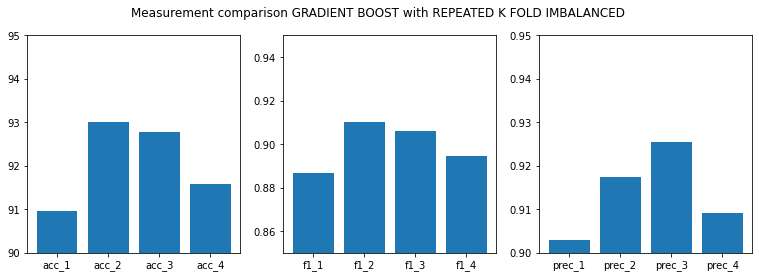

In [94]:
plt.figure(figsize=(13, 4))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4'], [accuracy_GB_crossVal_imb[0], accuracy_GB_crossVal_imb[1], accuracy_GB_crossVal_imb[2],accuracy_GB_crossVal_imb[3]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4'], [f1_GB_crossVal_imb[0],f1_GB_crossVal_imb[1],f1_GB_crossVal_imb[2],f1_GB_crossVal_imb[3]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4'], [precision_GB_crossVal_imb[0], precision_GB_crossVal_imb[1], precision_GB_crossVal_imb[2],precision_GB_crossVal_imb[3]])
plt.suptitle('Measurement comparison GRADIENT BOOST with REPEATED K FOLD IMBALANCED')
plt.show()

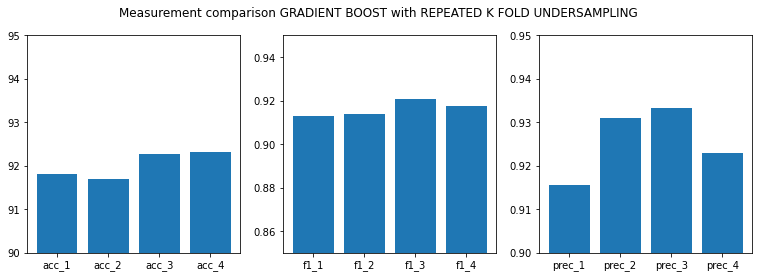

In [95]:
plt.figure(figsize=(13, 4))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4'], [accuracy_GB_crossVal_under[0], accuracy_GB_crossVal_under[1], accuracy_GB_crossVal_under[2],accuracy_GB_crossVal_under[3]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4'], [f1_GB_crossVal_under[0],f1_GB_crossVal_under[1],f1_GB_crossVal_under[2],f1_GB_crossVal_under[3]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4'], [precision_GB_crossVal_under[0], precision_GB_crossVal_under[1], precision_GB_crossVal_under[2],precision_GB_crossVal_under[3]])
plt.suptitle('Measurement comparison GRADIENT BOOST with REPEATED K FOLD UNDERSAMPLING')
plt.show()

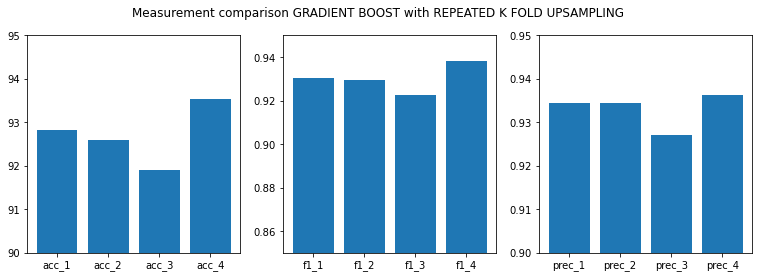

In [96]:
plt.figure(figsize=(13, 4))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_1', 'acc_2', 'acc_3', 'acc_4'], [accuracy_GB_crossVal_up[0], accuracy_GB_crossVal_up[1], accuracy_GB_crossVal_up[2],accuracy_GB_crossVal_up[3]])
plt.subplot(132)
plt.ylim(0.85,0.95)
plt.bar(['f1_1', 'f1_2','f1_3','f1_4'], [f1_GB_crossVal_up[0],f1_GB_crossVal_up[1],f1_GB_crossVal_up[2],f1_GB_crossVal_up[3]])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_1', 'prec_2', 'prec_3','prec_4'], [precision_GB_crossVal_up[0], precision_GB_crossVal_up[1], precision_GB_crossVal_up[2],precision_GB_crossVal_up[3]])
plt.suptitle('Measurement comparison GRADIENT BOOST with REPEATED K FOLD UPSAMPLING')
plt.show()

### NAIVE BAYES

In [97]:
#NaiveBayes
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [98]:
model = MultinomialNB()
model.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = model.predict(X_test_upsampled)

In [99]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled_NB = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled_NB = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled_NB = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [100]:
print("Accuracy: ", accuracy_upsampled_NB)
print("F1 Score: ", f1_upsampled_NB)
print("Precision: ", precision_upsampled_NB)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  79.04135338345864
F1 Score:  0.7878211227402474
Precision:  0.8230616302186878
Recall:  0.7554744525547445
Specificity:  0.8275193798449613
Sensitivity:  0.7554744525547445
True positive:  414
False positive:  89
True negative:  427
False negative:  134


### RANDOM FOREST

In [101]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [102]:
#random forest
random_forest = RandomForestClassifier(max_depth=25, random_state=0)
random_forest.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = random_forest.predict(X_test_upsampled)

In [103]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled_RF = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled_RF = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled_RF = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [104]:
print("Accuracy: ", accuracy_upsampled_RF)
print("F1 Score: ", f1_upsampled_RF)
print("Precision: ", precision_upsampled_RF)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  97.08646616541353
F1 Score:  0.9717925386715195
Precision:  0.969147005444646
Recall:  0.9744525547445255
Specificity:  0.9670542635658915
Sensitivity:  0.9744525547445255
True positive:  534
False positive:  17
True negative:  499
False negative:  14


### k - NEAREST NEIGHBORS

In [105]:
#knn
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.20)
scaler = StandardScaler()
X_train_upsampled = scaler.fit_transform(X_train_upsampled)
X_test_upsampled = scaler.transform(X_test_upsampled)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = classifier.predict(X_test_upsampled)

In [106]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled_KNN = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled_KNN = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled_KNN = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [107]:
print("Accuracy: ", accuracy_upsampled_KNN)
print("F1 Score: ", f1_upsampled_KNN)
print("Precision: ", precision_upsampled_KNN)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  91.35338345864662
F1 Score:  0.9191564147627416
Precision:  0.9032815198618307
Recall:  0.9355992844364938
Specificity:  0.8891089108910891
Sensitivity:  0.9355992844364938
True positive:  523
False positive:  56
True negative:  449
False negative:  36


### NAIVE BAYES, RANDOM FOREST, k - NEAREST NEIGHBORS (prikaz rezultata)

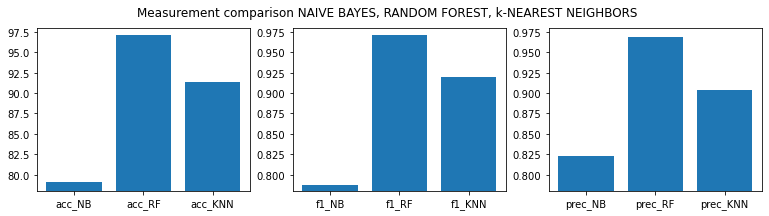

In [108]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(78,98)
plt.bar(['acc_NB', 'acc_RF', 'acc_KNN'], [accuracy_upsampled_NB, accuracy_upsampled_RF, accuracy_upsampled_KNN])
plt.subplot(132)
plt.ylim(0.78,0.98)
plt.bar(['f1_NB', 'f1_RF','f1_KNN'], [f1_upsampled_NB, f1_upsampled_RF, f1_upsampled_KNN])
plt.subplot(133)
plt.ylim(0.78,0.98)
plt.bar(['prec_NB', 'prec_RF', 'prec_KNN'], [precision_upsampled_NB, precision_upsampled_RF, [precision_upsampled_KNN]])
plt.suptitle('Measurement comparison NAIVE BAYES, RANDOM FOREST, k-NEAREST NEIGHBORS')
plt.show()

# Algoritmi za redukciju dimenzionalnosti
### RECURSIVE FEATURE ELIMINATION - RFE

In [109]:
#RFE feature reduction over logistic regression model
X = df_undersampled.drop("label_spam", axis = 1)
y = df_undersampled["label_spam"]
model = LogisticRegression(max_iter = 3000)
rfe_model = RFE(model, n_features_to_select = 5)
rfe_prediction = rfe_model.fit(X,y)
feature_list = rfe_prediction.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_undersampled.columns[feature])
    key_columns.append(df_undersampled.columns[feature])
key_columns.append("label_spam")
    

word_freq_remove
word_freq_000
word_freq_george
word_freq_cs
char_freq_$


In [110]:
columns_to_remove = []
df_rfe = df_undersampled.copy(deep=True)
for column in df_rfe.columns:
    if column not in key_columns:
        columns_to_remove.append(column)
        
rfe_removed = df_rfe.drop(columns_to_remove, axis=1)
rfe_removed.head()
        

,word_freq_remove,word_freq_000,word_freq_george,word_freq_cs,char_freq_$,label_spam
2163,0.31,0.0,0.95,0.00,0.0,0
3059,0.00,0.0,0.55,0.00,0.0,0
3512,0.00,0.0,0.00,0.00,0.0,0
4448,0.00,0.0,0.00,0.00,0.0,0
2513,0.00,0.0,0.00,1.56,0.0,0


In [111]:
X = rfe_removed.drop("label_spam",axis = 1).values
y = rfe_removed["label_spam"].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

rfe_logistic_regression_model = LogisticRegression(max_iter = 3000)
rfe_logistic_regression_model.fit(X_train,y_train)
rfe_prediction = rfe_logistic_regression_model.predict(X_test)

In [112]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=rfe_prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy_RFE = accuracy_score(y_test,rfe_prediction)*100
f1_RFE = f1_score(y_test, rfe_prediction)
precision_RFE = precision_score(y_test, rfe_prediction)
recall = recall_score(y_test, rfe_prediction)

In [113]:
print("Accuracy: ", accuracy_RFE)
print("F1 Score: ", f1_RFE)
print("Precision: ", precision_RFE)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  82.1173104434907
F1 Score:  0.7771836007130124
Precision:  0.9646017699115044
Recall:  0.6507462686567164
Specificity:  0.978021978021978
Sensitivity:  0.6507462686567164
True positive:  218
False positive:  8
True negative:  356
False negative:  117


### LASSO

In [114]:
#Lasso
X = df_undersampled.drop("label_spam", axis = 1)
y = df_undersampled["label_spam"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
lasso = LassoCV(cv=3)
select_from_model = SelectFromModel(lasso,threshold = 0.01)
select_from_model.fit(X, y)
feature_list = select_from_model.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_undersampled.columns[feature])
    key_columns.append(df_undersampled.columns[feature])
    
key_columns.append("label_spam")


word_freq_free
word_freq_you
word_freq_your
word_freq_hp
word_freq_george
char_freq_!


In [115]:
columns_to_remove = []
df_lasso = df_undersampled.copy(deep=True)
for column in df_lasso.columns:
    if column not in key_columns:
        columns_to_remove.append(column)
        
lasso_removed = df_lasso.drop(columns_to_remove, axis=1)
lasso_removed.head()

,word_freq_free,word_freq_you,word_freq_your,word_freq_hp,word_freq_george,char_freq_!,label_spam
2163,0.0,0.63,0.63,0.00,0.95,0.000,0
3059,0.0,1.67,0.00,3.91,0.55,0.367,0
3512,0.0,0.23,0.00,0.23,0.00,0.000,0
4448,0.0,3.84,0.00,1.28,0.00,0.000,0
2513,0.0,0.00,0.00,0.00,0.00,0.000,0


In [116]:
X = lasso_removed.drop("label_spam",axis = 1).values
y = lasso_removed["label_spam"].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

lasso_logistic_regression_model = LogisticRegression(max_iter = 3000)
lasso_logistic_regression_model.fit(X_train,y_train)
lasso_prediction = lasso_logistic_regression_model.predict(X_test)

In [117]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=lasso_prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy_LASSO = accuracy_score(y_test,lasso_prediction)*100
f1_LASSO = f1_score(y_test, lasso_prediction)
precision_LASSO = precision_score(y_test, lasso_prediction)
recall = recall_score(y_test, lasso_prediction)

In [118]:
print("Accuracy: ", accuracy_LASSO)
print("F1 Score: ", f1_LASSO)
print("Precision: ", precision_LASSO)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  83.40486409155938
F1 Score:  0.825301204819277
Precision:  0.8328267477203647
Recall:  0.817910447761194
Specificity:  0.8489010989010989
Sensitivity:  0.817910447761194
True positive:  274
False positive:  55
True negative:  309
False negative:  61


### EXTRA TREE

In [119]:
et_classifier = ExtraTreesClassifier()
et_classifier.fit(X,y)
select_from_model = SelectFromModel(et_classifier, threshold = 0.05)
select_from_model.fit(X,y)
feature_list = select_from_model.get_support(indices=True)
for feature in feature_list:
    print(df_undersampled.columns[feature])


word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over


### PRINCIPAL COMPONENT ANALYSIS - PCA

In [122]:
#PCA feature variances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
feature_variances = pca.explained_variance_ratio_
feature_variances

array([0.35397319, 0.25806194, 0.18549058, 0.11084474, 0.05957062,
       0.03205893])

# Kombinacija logističke regresije sa PCA algoritmom

In [123]:
#PCA decomposition over LogisticRegression
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train, y_test = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

pca = PCA(n_components = 20)
X_train_upsampled = pca.fit_transform(X_train_upsampled)
X_test_upsampled = pca.transform(X_test_upsampled)
logmodel=LogisticRegression(max_iter = 3000)
logmodel.fit(X_train_upsampled, y_train)
prediction = logmodel.predict(X_test_upsampled)

In [124]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy_PCA = accuracy_score(y_test,prediction)*100
f1_PCA = f1_score(y_test, prediction)
precision_PCA = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [125]:
print("Accuracy: ", accuracy_PCA)
print("F1 Score: ", f1_PCA)
print("Precision: ", precision_PCA)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  88.43984962406014
F1 Score:  0.888283378746594
Precision:  0.8842676311030742
Recall:  0.8923357664233577
Specificity:  0.875968992248062
Sensitivity:  0.8923357664233577
True positive:  489
False positive:  64
True negative:  452
False negative:  59


### RFE, LASSO i PCA sa LOGISTIC REGRESSION (prikaz rezultata)

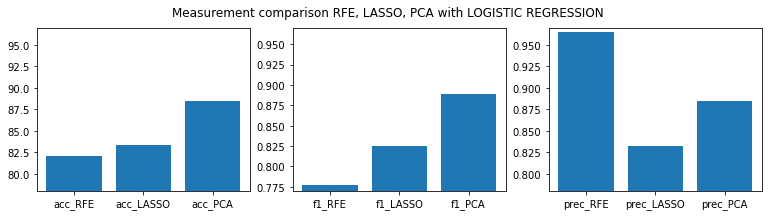

In [129]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(78,97)
plt.bar(['acc_RFE', 'acc_LASSO', 'acc_PCA'], [accuracy_RFE, accuracy_LASSO, accuracy_PCA])
plt.subplot(132)
plt.ylim(0.77,0.97)
plt.bar(['f1_RFE', 'f1_LASSO','f1_PCA'], [f1_RFE, f1_LASSO, f1_PCA])
plt.subplot(133)
plt.ylim(0.78,0.97)
plt.bar(['prec_RFE', 'prec_LASSO', 'prec_PCA'], [precision_RFE, precision_LASSO, [precision_PCA]])
plt.suptitle('Measurement comparison RFE, LASSO, PCA with LOGISTIC REGRESSION')
plt.show()

### RIDGE REGRESSION

In [130]:
#Ridge
#error over train set 
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train, y_test = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

model = Ridge(alpha = 0.04, normalize = True)
model_fit = model.fit(X_train_upsampled, y_train)
prediction_train = model_fit.predict(X_train_upsampled)
print("Train set errors:")
print(np.sqrt(mean_squared_error(y_train,prediction_train)))
print(r2_score(y_train, prediction_train))

#error over test set
prediction_test = model_fit.predict(X_test_upsampled)
print("Test set errors:")
print(np.sqrt(mean_squared_error(y_test,prediction_test)))
print(r2_score(y_test, prediction_test))

Train set errors:
0.3345877940499901
0.5509484009288699
Test set errors:
0.34410420607070324
0.5259403865108976


# ROC CURVE

In [131]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train, y_test = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [132]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train_upsampled)
X_test_upsampled=sc.transform(X_test_upsampled)
logmodel=LogisticRegression(max_iter = 3000)
logmodel.fit(X_train_upsampled,y_train)
prediction = logmodel.predict(X_test_upsampled)

In [133]:
fpr, tpr, threshold = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

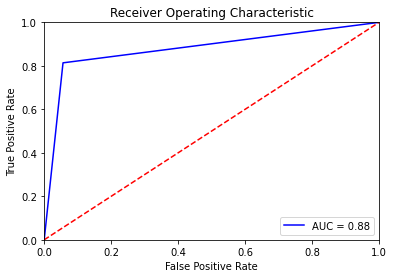

In [134]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()